<a href="https://colab.research.google.com/github/spuzi/MarathonTimePrediction/blob/main/Marathon_time_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files # To load the files from local
import io
import pandas as pd
import matplotlib.pyplot as plt


# Marathon time Predictions

Source: https://www.kaggle.com/datasets/girardi69/marathon-time-predictions

In [2]:
uploaded = files.upload()

Saving MarathonData.csv to MarathonData.csv


In [3]:
data_marathon = pd.read_csv(io.BytesIO(uploaded['MarathonData.csv']))

### Sample of the data
Columns:
- km4week: mean kilometers runned in the last 4 weeks of preparation
- sp4week: mean velocity during the last 4 weeks of preparation
- CrossTraining: apart from running if the athlete did another sport
- Wall21: time when the athlete reached half marathon
- MarathonTime: variable that we want to predict. When the athlete reach the end


In [4]:
data_marathon.head(3)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A


In [5]:
data_marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [6]:
# We can see that the column 'Wall21' is an object type when it should be a string. 
# Conver data to number and the error ignore it
data_marathon['Wall21'] =  pd.to_numeric(data_marathon['Wall21'], errors="coerce")

In [7]:
data_marathon[['km4week', 'sp4week', 'Wall21', 'MarathonTime']].describe()

,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,81.000000,87.000000
mean,62.347126,139.840706,1.630617,3.319080
std,26.956019,1191.427864,0.210490,0.376923
min,17.900000,8.031414,1.160000,2.370000
25%,44.200000,11.498168,1.450000,3.045000
50%,58.800000,12.163424,1.620000,3.320000
75%,77.500000,12.854036,1.760000,3.605000
max,137.500000,11125.000000,2.050000,3.980000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5696d8810>,
      dtype=object)

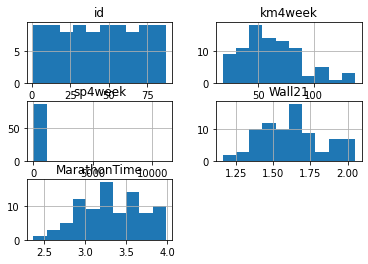

In [8]:
# We can show some histograms with the distributions of the variables
data_marathon.hist()

In [9]:
# We can delete the columns that are not uselful for predicting the target variable
data_marathon = data_marathon.drop(columns=['id', 'Name', 'Marathon', 'CATEGORY'])

In [10]:
data_marathon.head()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74


In [11]:
# Calculate the number of nulls for each variable
data_marathon.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

In [12]:
# Fill with 0 the None values
data_marathon['CrossTraining'] = data_marathon['CrossTraining'].fillna(0)

In [15]:
data_marathon.head(3)

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66


In [16]:
# There are 6 rows with None values in "Category", we can delete these 6 rows 
data_marathon = data_marathon.dropna(how='any')

In [17]:
# Now we have to convert the string variables to number variables because the 
# model doesn't like to work with string variables
# We have 2 string columns:
# - Category
# - CrossTraining

In [18]:
# We can see how many different values are in the variable 'CrossTraining'
data_marathon['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [19]:
# Now we can replace the string values of the column "CrossTraining" by numbers
cross_values = {
    'CrossTraining' :{
        'ciclista 1h': 1,
        'ciclista 4h': 2, 
        'ciclista 13h': 3, 
        'ciclista 3h': 4,
       'ciclista 5h': 5
    }
}

In [20]:
data_marathon.replace(cross_values, inplace=True)

In [21]:
data_marathon['CrossTraining'].unique()

array([0, 1, 2, 3, 4, 5])

In [22]:
data_marathon

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,4,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [23]:
# We can see how many different values are in the variable 'Category'
data_marathon['Category'].unique()


array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [24]:
# Now we can replace the string values of the column "CrossTraining" by numbers
category_values = {
    'Category' :{
      'MAM': 1, 
      'M45': 2, 
      'M40': 3, 
      'M50': 4, 
      'M55': 5, 
      'WAM': 6
    }
}

In [25]:
data_marathon.replace(category_values, inplace=True)

In [26]:
data_marathon

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,4,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


In [27]:
# Now we will try to get any kind of relationship that may be between the variables. 
# For that we will paint the "MarathonTime" which is the variable we want to predict VS the other 
# variables that we think thay may be relation

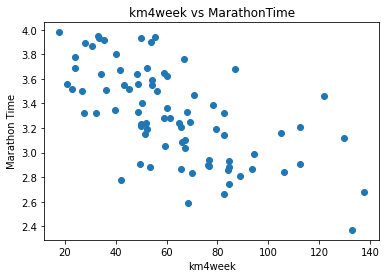

In [28]:
# "MarathonTime" vs "km4week"
plt.scatter(x=data_marathon['km4week'], y=data_marathon['MarathonTime'])
plt.title('km4week vs MarathonTime')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()

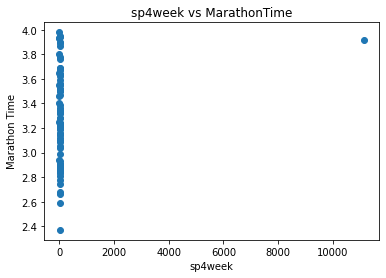

In [29]:
# "MarathonTime" vs "sp4week"
plt.scatter(x=data_marathon['sp4week'], y=data_marathon['MarathonTime'])
plt.title('sp4week vs MarathonTime')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

In [30]:
# There is just one value that is an outlayer. We can eliminate that value
data_marathon = data_marathon.query('sp4week < 1000')

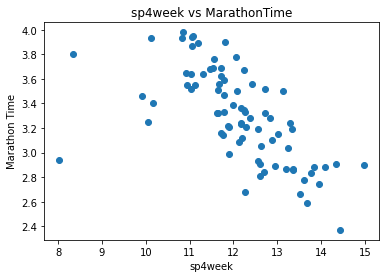

In [31]:
# "MarathonTime" vs "sp4week"
plt.scatter(x=data_marathon['sp4week'], y=data_marathon['MarathonTime'])
plt.title('sp4week vs MarathonTime')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

In [32]:
# To resume what we have done until now:
#  1. First look at the data. Understand the data we have
#  2. Delete data without any sense. Let just the data that have some potencial
#  3. Delete the rows with nulls or replace the nulls with some strategy:
#        - Delete rows with nulls
#        - Replace by 0 
#        - Replace by the median     
#  4. Non numeric data => Numeric data. The model doesn't understand non numeric
#                                       values
#  5. Delete outliers

# Now we can pass to the machine learning


In [34]:
data_marathon.head(3)

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66


In [35]:
# We are going to divide the table into:
# - Training (80%)
# - Test (20%)

In [37]:
# Training Set
# random_state => number to be able to reproduce the same test in the future
training_data = data_marathon.sample(frac=0.8, random_state=0)
training_data.count()

Category         64
km4week          64
sp4week          64
CrossTraining    64
Wall21           64
MarathonTime     64
dtype: int64

In [47]:
# Test Set

# To get the test set we delete the data that is in the training set
test_data =  data_marathon.drop(training_data.index)

In [48]:
test_data.count()

Category         16
km4week          16
sp4week          16
CrossTraining    16
Wall21           16
MarathonTime     16
dtype: int64

In [51]:
# Now we have to separate the variable that we want to predict "MarathonTime"
# For that we are going to store the target variable in 2 tables

In [52]:
training_labels = training_data.pop('MarathonTime')
test_labels = test_data.pop('MarathonTime')

In [54]:
training_labels.head(2)

54    3.47
28    3.15
Name: MarathonTime, dtype: float64

In [55]:
test_labels.head(2)

9     2.86
12    2.88
Name: MarathonTime, dtype: float64

In [57]:
# Now the training table doesn't have the target variable
training_data.head(3)

,Category,km4week,sp4week,CrossTraining,Wall21
54,3,70.7,11.783333,0,1.77
28,2,51.6,13.008403,0,1.50
31,1,79.4,13.344538,0,1.60


In [58]:
# Now we are going to train a Linear Regresion model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# We have to pass the training data (without the target variable) and another 
# table with the training target variable
model.fit(training_data, training_labels)

LinearRegression()

In [60]:
# Now that we have our model trained, we can predict with the test data
predictions = model.predict(test_data)

In [61]:
predictions

array([2.79262937, 2.82359947, 3.05763355, 3.04142169, 3.06227741,
       3.29594219, 3.36224805, 3.36333935, 3.17791435, 3.29370445,
       3.38283165, 3.52761738, 3.59840905, 3.51797973, 3.67914137,
       3.82232527])

In [69]:
# As we already knew the real results, now we can compare how well 
# the model did predicting 
import numpy as np
from sklearn.metrics import mean_squared_error
error_predicting = mean_squared_error(test_labels, predictions)
error_predicting = np.sqrt(error_predicting)
error_predicting = error_predicting * 100
print("Error predicting {}%".format(error_predicting))

Error predicting 11.209768755620248%


In [70]:
# So we know that we have a 11% of error. For us a 11% its enough to give an OK
# to this model. We can predict when the running will cross the end with an 
# 11% of error in time

In [71]:
training_data.head(2)

,Category,km4week,sp4week,CrossTraining,Wall21
54,3,70.7,11.783333,0,1.77
28,2,51.6,13.008403,0,1.50


array([[  1. , 400. ,  20. ,   0. ,   1.4]])

In [82]:
# Now we can pass to the model a new runner to predict when will this runner
# cross the end of the marathon
new_runner_data = np.array([[
    1, # Category 
    400, # km4week
    20, # sp4week
    0, # CrossTraining,
    1.4, # Wall21
]])

new_runner = pd.DataFrame(new_runner_data, 
             columns=['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21'])

In [83]:
new_runner

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,20.0,0.0,1.4


In [84]:
model.predict(new_runner)

array([2.15535773])

In [ ]:
# Our model predict that this runner will end the marathon in 2.1 hours